In [1]:
# !pip install plotly_express

In [2]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 생존자 분석

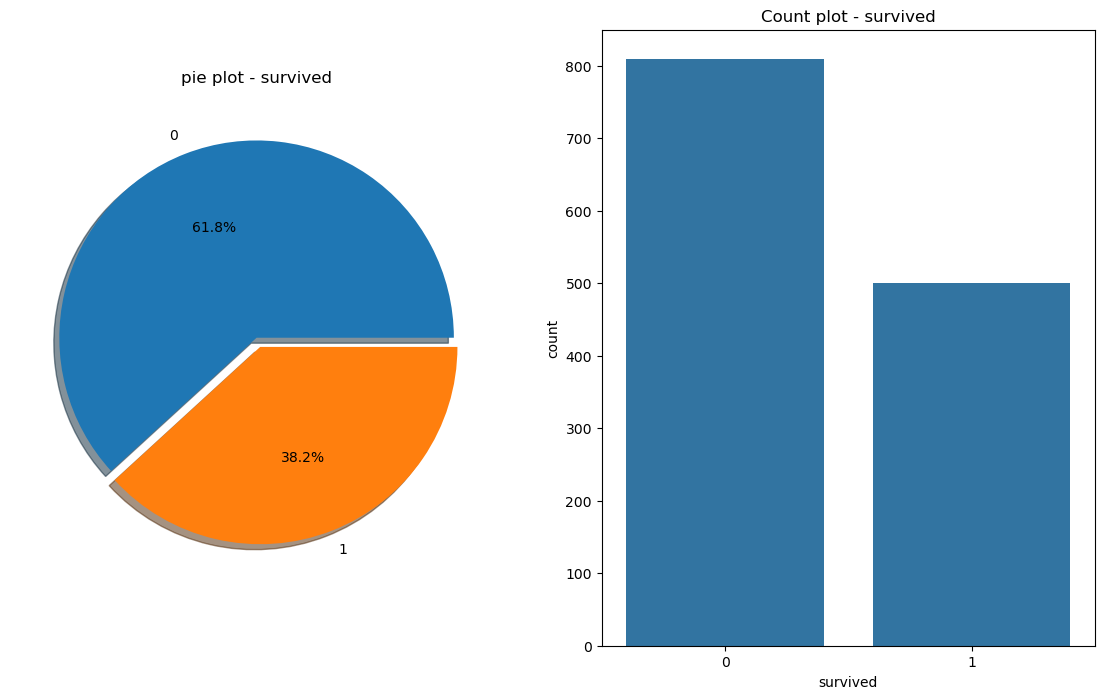

In [5]:
# subplots : 그래프 2개 생성 옵션
f, ax = plt.subplots(1, 2, figsize=(14, 8))

# titanic excel 파일을 읽어와서 survived 컬럼을 pie를 이용해 원형그래프 생성
titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])
                                                            # 그림자 생성 옵션  # 원 띄우는 옵션
ax[0].set_title('pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

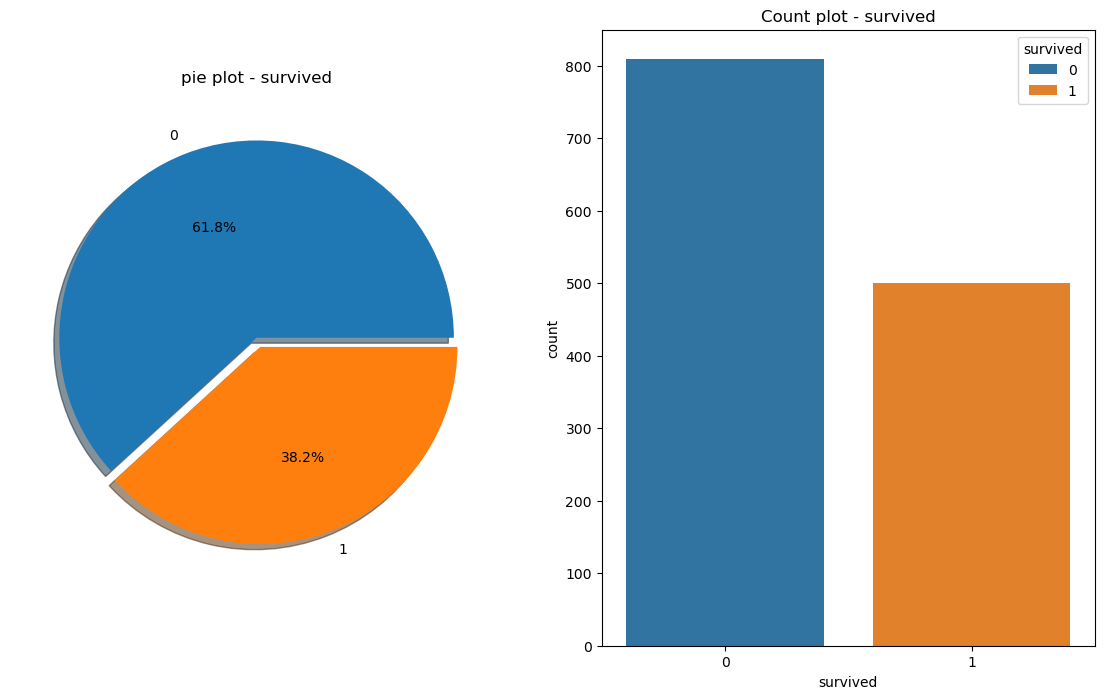

In [6]:
# subplots : 그래프 2개 생성 옵션
f, ax = plt.subplots(1, 2, figsize=(14, 8))

# titanic excel 파일을 읽어와서 survived 컬럼을 pie를 이용해 원형그래프 생성
titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])
                                                            # 그림자 생성 옵션  # 원 띄우는 옵션
ax[0].set_title('pie plot - survived')
ax[0].set_ylabel('')
# 원래 강의 영상에선 자동으로 왼쪽 막대그래프도 가시성을 위해 색이 다르게 나오는데 그러지 않기에 hue='survived' 옵션을 줘서 생존자를 컬러표시함
sns.countplot(x='survived', data=titanic, ax=ax[1], hue='survived')
ax[1].set_title('Count plot - survived')

plt.show()

# 2. 성별에 따른 생존 분석

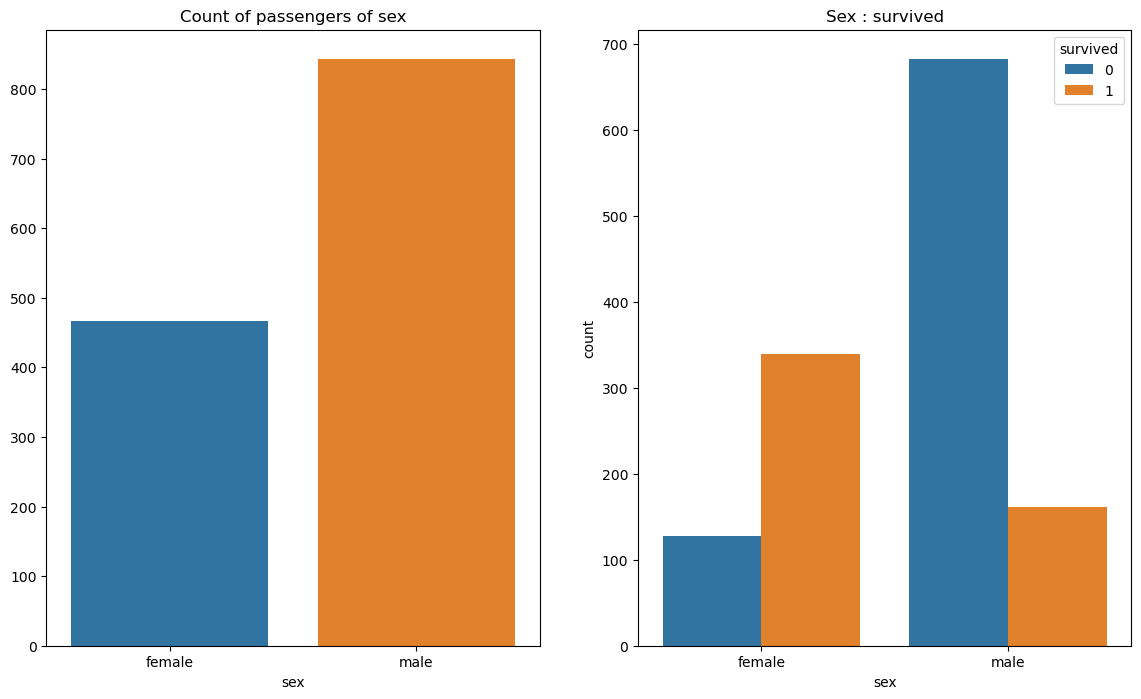

In [7]:
# subplots : 그래프 2개 생성 옵션
f, ax = plt.subplots(1, 2, figsize=(14, 8))

# titanic excel 파일을 읽어와서 survived 컬럼을 pie를 이용해 원형그래프 생성
sns.countplot(x='sex', data=titanic, ax=ax[0], hue='sex')

ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

# hue 매개변수를 사용하여 생존 여부에 따라 막대를 다른 색으로 나눔
sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex : survived')

plt.show()

### 위 그래프 분석 결과
- 생존한 사람 : 350
- 생존하지 못한 사람 : 100 좀 넘음
- 800명이 넘는 남성들은 700명이 안돼는 숫자가 생존못함 즉 여성의 생존인원에 2배가 생존 못함
- 약 4배의 사람들이 생존하지 못함
- 남성 탑승색 : 800 > 여성 탑승객 : 480
- 남성 생존자 : 150 < 여성 생존자 : 350
- 즉 탑승객의 인원은 남성이 여성보다 2배가량 많으나 반대로 생존자는 여성이 2배로 많다는걸 확인 


-------------------------------------------------------------------------------------------------------

# 3. 경제력 대비 생존률(등급 실별, ex : vip실, 일반실 등)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


#### 위 표를 확인하면 1등실의 탑승객 중 생존자가 절반 이상이고
#### 나머지 2, 3 등급실은 탑승객 중 사망자가 더 많다.
#### 가설 : 그럼 1등실에는 여성이 많이 타고 있었나? 의문점

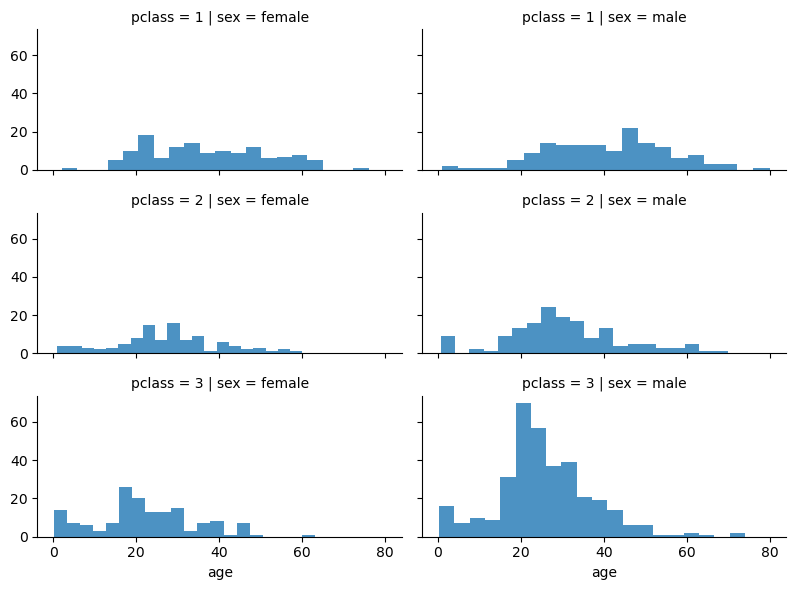

In [10]:
# 히스토그램을 그리기 위해 데이터를 매핑하고 시각화
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=2, aspect=2)
# 'age' 열을 기준으로 히스토그램을 그림 alpha 옵션을 사용해 투명도 줌 bins 옵션을 사용해허 구간별로 나눔
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
# 범례 추가
grid.add_legend();

### 위 그래프를 확인한 결과 3등급 실에서 10대 중반부터 30대 중반까지의 남성 수가 다른 실보다 월등히 많다

----------------------------------------------

# 4. 나이별 승객 현황

In [11]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

-----------------------------------------

# 5. 등실별 생존률을 연령별로 확인

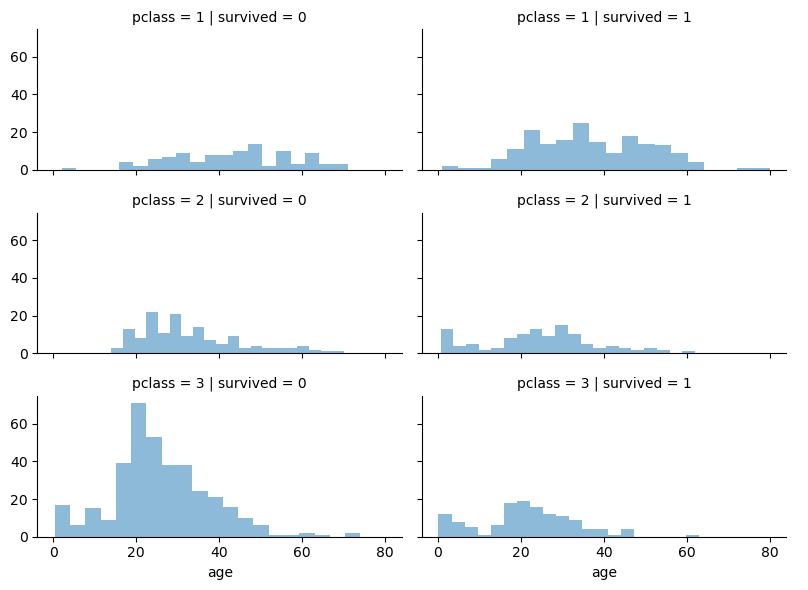

In [12]:
# 히스토그램을 그리기 위해 데이터를 매핑하고 시각화
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=2, aspect=2)
# 'age' 열을 기준으로 히스토그램을 그림 alpha 옵션을 사용해 투명도 줌 bins 옵션을 사용해허 구간별로 나눔
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
# 범례 추가
grid.add_legend();

In [13]:
# 나이별 등급 컬럼을 추가하고 bins=으로 등급 기준을 설정 후 labels로 등급 이름 설정 include_lowest = True 는 bins의 각 구간 구별
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
                        include_lowest = True,
                        labels = ['baby', 'teen', 'young', 'adult', 'old'])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


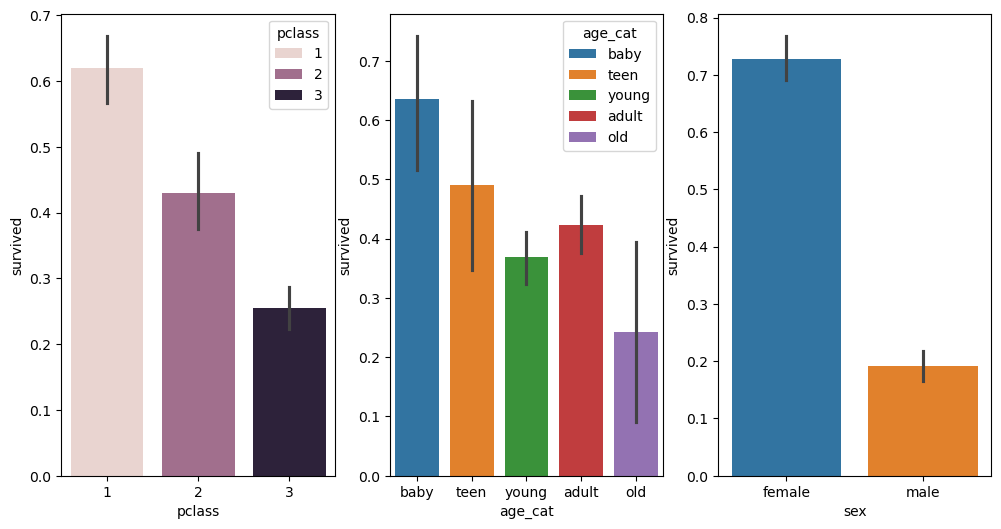

In [14]:
plt.figure(figsize=(12, 6))
# 원래 기본값으로 그래프 색이 다르게나와야 하나 왜인지 모르게 색이 동일하게 나와서 hue=옵션을 줌
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic, hue='pclass')

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic, hue='age_cat')


plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic, hue='sex')


plt.show()

Text(0.5, 1.0, 'male')

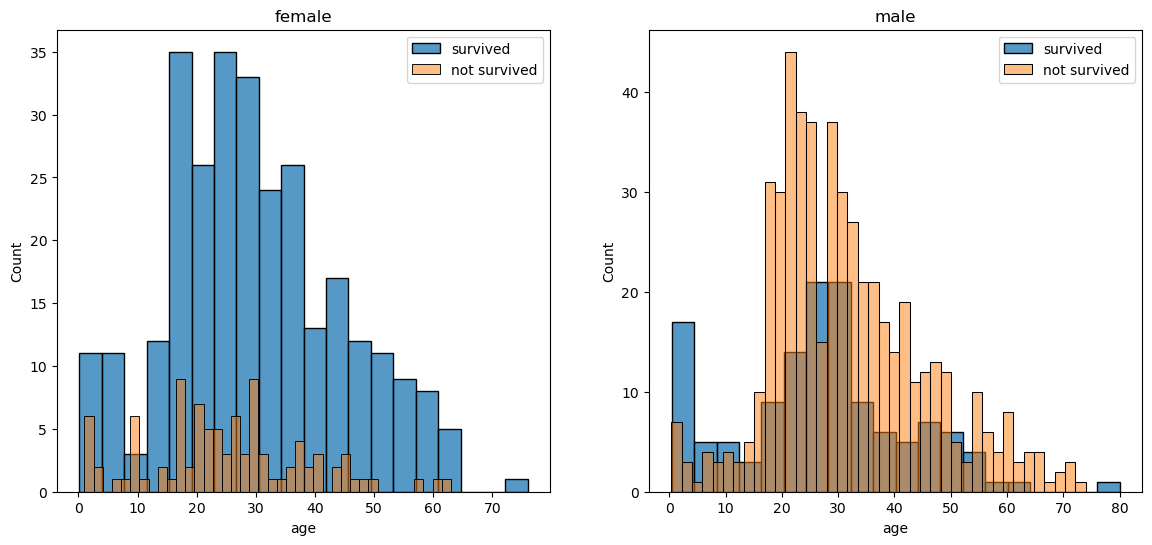

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

sns.histplot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0])
sns.histplot(women[women['survived']==0]['age'], bins=40, label='not survived', ax=axes[0], alpha=0.5)
axes[0].legend()
axes[0].set_title('female')

sns.histplot(men[men['survived']==1]['age'], bins=20, label='survived', ax=axes[1])
sns.histplot(men[men['survived']==0]['age'], bins=40, label='not survived', ax=axes[1], alpha=0.5)
axes[1].legend()
axes[1].set_title('male')


--------------------

# 6. 사회적 신분으로 분류
- 위 그래프를 확인 후 등급 실별로 신분을 분류(귀족, 평민 등)

In [16]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])
# '\,\s\w+(\s\w+)?\.' : 문자열에서 쉼표 뒤에 나오는 이름의 호칭을 찾아내고. 이름 뒤에는 공백과 단어가 하나 이상 있음. 때로는 그 뒤에 공백과 단어가 또 나올 수도 있고, 끝에는 마침표가 있음

# titanic 데이터에 'title 이라는 컬럼을 title로 채워 넣음
titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [17]:
# titanic 데이터셋에서 'title'과 'sex' 열 간의 교차표 생성 
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [18]:
# unique를 사용해 title 컬럼안에 있는 호칭을 확인
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [19]:
# 카테고리 정리, 분리 작업 ex : Mlle'을 'Miss'로 대체
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

# 'Rare_f'에 속하는 호칭을 'Rare Female'로 대체
Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

In [20]:
# 'Rare_f' 리스트에 있는 호칭을 'Rare_f'로 대체
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

# 'Rare_m' 리스트에 있는 호칭을 'Rare_m'로 대체
for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

In [21]:
# 결과 확인
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [22]:
# titanic 에서 title 과 survived 컬럼을 groupby로 묶어서 title로 다시 보고 평균값을 잡음(mean()함수 사용) 생존률이 높은 순으로 확인
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean().sort_values(by='survived', ascending=False)

,title,survived
3,Rare_f,1.000000
2,Mrs,0.787879
0,Miss,0.678030
4,Rare_m,0.448276
1,Mr,0.162483


------------------------------------

# 최종 머신러닝을 이용한 생존자 예측

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [24]:
# info()를 확인하면 sex가 str이여서 int형으로 변환

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

LabelEncoder()

In [25]:
# info()를 확인하면 sex가 str이여서 int형으로 변환
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 165.2+ KB


In [27]:
# titanic 에 age, fare 컬럼 중에 notnull 인것만 취급해서 인포 결과 확인
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


In [28]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']
# 데이터를 학습용과 테스트용으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=13)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 정확도 점수를 계산하는 모듈 accuracy_score

# fit으로 학습시킴
dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [30]:
pred = dt.predict(x_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [31]:
# titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]

import numpy as np

# 내가 지정한 데이터의 int를 맞춰서 변수 데이터에 지정 
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
# dicaprio의 생존률을 반환
print('Dicaprio : ', dt.predict_proba(dicaprio)[0, 1])

Dicaprio :  0.22950819672131148


/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [32]:
# 내가 지정한 데이터의 int를 맞춰서 변수 데이터에 지정 
winslet = np.array([[1, 16, 1, 1, 100, 0]])

# winslet 생존률을 반환
print('Winslet : ', dt.predict_proba(winslet)[0, 1])

Winslet :  1.0


/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

